In [1071]:
import matplotlib.pyplot as plt
import pandas as pd

  
def onehot(x):
    return (2**(x-1)) if x != 0 else 0

def comparator(a):
    df= pd.DataFrame(a)
    amax = df.max(axis=0)
    aidx = df.idxmax(axis=0)
    c = []
    for i in range(len(aidx)):
        c.append(onehot(aidx[i]+1) if amax[i]!=0 else 0)
    return c

def flatten_ts(_2d_list):
    if not isinstance(_2d_list, list):
        return [_2d_list]  
    _1d_list = []
    seen = set()
    for i in _2d_list:
        if isinstance(i, list):
            for j in i:
                if j not in seen:
                    seen.add(j)
                    _1d_list.append(j)
        else:
            if i not in seen:
                seen.add(i)
                _1d_list.append(i)
    
    _1d_list.sort()
    return _1d_list


def layer_output_spike(input_spike, output_vector, neuron_num):
    time_stamp = [[] for _ in range(neuron_num)]
    ints = flatten_ts(input_spike)

    for i in ints:
        for j in range(neuron_num):
            if(output_vector[i] == onehot(j+1)):
                time_stamp[j].append(i)
            elif(output_vector[i+1] == onehot(j+1)):
                time_stamp[j].append(i+1)
            elif(output_vector[i+2] == onehot(j+1)):
                time_stamp[j].append(i+2)                
    return time_stamp


class Synapse:
    def __init__(self, w, ts):
        self.w = w
        self.ts = ts
        self.membrane_potential = 0
    
    def update(self, t):
        if t in self.ts:
            self.membrane_potential = self.membrane_potential + self.w*(2**8)
        else:
            self.membrane_potential -= self.w
        
        if self.membrane_potential < 0:
            self.membrane_potential = 0
    
    def run(self, time):
        self.membrane_potential = 0
        output = []
        for t in range(time):
            self.update(t)
            output.append(self.membrane_potential)
        return output
    

class Neuron:
    def __init__(self, n, synapse_weights, synapse_spikes, threshold):
        self.n = n
        self.synapses = []
        self.synapse_weights = synapse_weights
        for i in range(n):
            self.synapses.append(Synapse(w=self.synapse_weights[i], ts=synapse_spikes[i]))
        self.threshold = threshold
    
    def update(self):
        sum_result = sum(self.synapses[i].membrane_potential for i in range(self.n))
        if sum_result >= self.threshold:
            return sum_result
        else:
            return 0
    
    def run(self, time):
        output = []
        for t in range(time):
            for i in range(self.n):
                self.synapses[i].update(t)
            output.append(self.update())
        return output


class Layer:
    def __init__(self, neuron_num, neuron_input_num, synapse_weights, synapse_spikes, threshold):
        self.neuron_num =  neuron_num
        self.neurons = [Neuron(neuron_input_num, synapse_weights[i], synapse_spikes, threshold[i]) for i in range(neuron_num)]
    
    def runlayer(self, time):
        output = []
        for t in range(time):
            neuron_outputs = [n.run(t) for n in self.neurons]
        max_output = max(neuron_outputs)
        neuron_index = comparator(neuron_outputs)
        layer_output = max_output 
        output.append(layer_output)
        return output, neuron_index
    
    

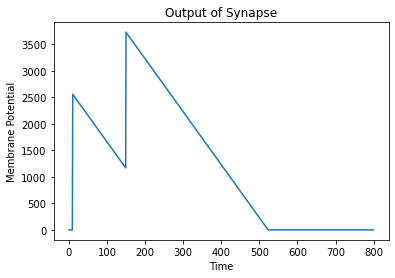

In [1072]:
# testing synapse
synapse = Synapse(w=10, ts=[10,150])
output = synapse.run(time=800)

plt.plot(range(800), output)
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Output of Synapse')
plt.show()


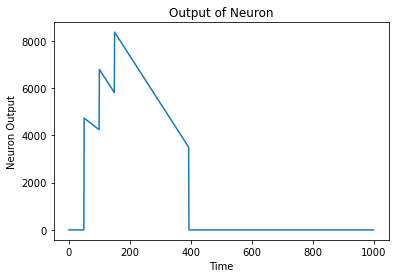

In [1073]:
synapse_weights = [10, 10]
synapse_spikes = [[10, 50],[100,150]]
th = 3500
neuron = Neuron(n=2, synapse_weights=synapse_weights, synapse_spikes=synapse_spikes, threshold=th)

output = neuron.run(time=1000)
plt.plot(range(1000), output)
plt.xlabel('Time')
plt.ylabel('Neuron Output')
plt.title('Output of Neuron')
plt.show()

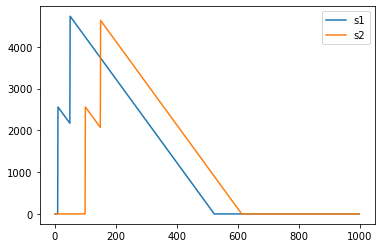

In [1074]:
sy = neuron.synapses
for i in sy:
    plt.plot(i.run(time =1000))
plt.legend(["s1","s2"])

In [1075]:
# Define the synapse weights and spike times for each neuron
neuron_num=2
neuron_input_num=2
neuron1_synapse_weights = [10, 30]
neuron1_threshold = 1000
neuron2_synapse_weights = [40, 50]
neuron2_threshold = 1000
thresholds = [neuron1_threshold, neuron2_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights]
spike_times = [[50], [100, 200]]

# Initialize the layer with two neurons
layer = Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights=synapse_weights, synapse_spikes=spike_times, threshold=thresholds)

# Run the simulation for 1000 time steps
lo = layer.runlayer(time=1000)[0]
neuron_indexes = layer.runlayer(time=1000)[1]
#neuron_indexes



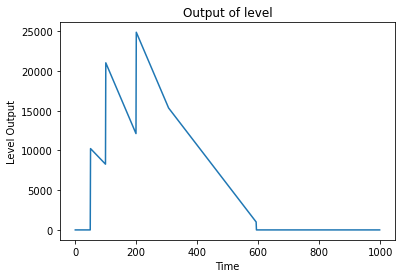

In [1076]:
plt.plot(range(999), lo[0])
plt.xlabel('Time')
plt.ylabel('Level Output')
plt.title('Output of level')
plt.show()

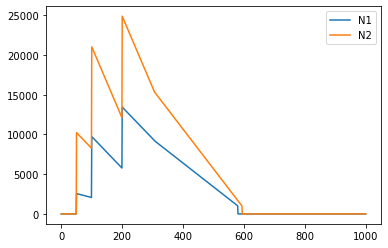

In [1077]:
for n in layer.neurons:
    plt.plot(range(1000), n.run(time=1000))
    
plt.legend(["N1", "N2"])

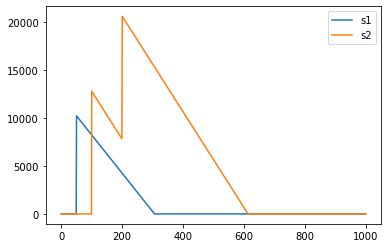

In [1078]:
m=layer.neurons
for i in m:
    j= i.synapses
    
for k in j:
    plt.plot(range(1000), k.run(time=1000))

plt.legend(["s1","s2","s3","s4"])

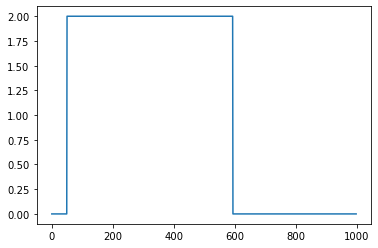

In [1079]:
plt.plot(range(999), neuron_indexes)

In [1080]:
#layer with four neurons each neuron 2 inputs
neuron_num=4
neuron_input_num=2
neuron1_synapse_weights = [100, 100, 100, 100]
neuron1_threshold = 20000
neuron2_synapse_weights = [100, 200, 200, 100]
neuron2_threshold = 80000
neuron3_synapse_weights = [200, 100, 100, 200]
neuron3_threshold = 40000
neuron4_synapse_weights = [200, 200, 200, 200]
neuron4_threshold = 125000
thresholds = [neuron1_threshold, neuron2_threshold, neuron3_threshold, neuron4_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights, neuron3_synapse_weights, neuron4_synapse_weights]
spike_times = [[100, 200] for _ in range(neuron_input_num)]

# Initialize the layer with two neurons
L2 = Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= spike_times, threshold= thresholds)

# Run the simulation for 1000 time steps
lo = L2.runlayer(time=1000)[0]
neuron_indexes = L2.runlayer(time=1000)[1]
x = layer_output_spike(spike_times,  L2.runlayer(time=1000)[1], neuron_num )
#neuron_indexes

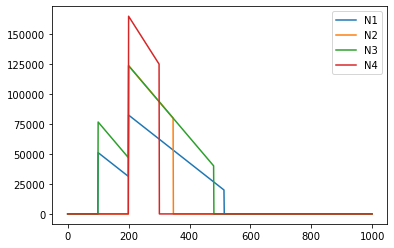

In [1081]:
for n in L2.neurons:
    plt.plot(range(1000), n.run(time=1000))
plt.legend(["N1", "N2", "N3", "N4"])



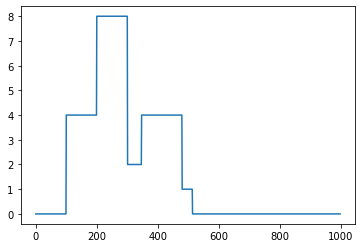

In [1082]:
plt.plot(neuron_indexes)

In [1083]:
x    

[[], [], [100], [200]]

In [1084]:
spike_times = [[10, 50, 120, 400], [10, 80, 100], [10, 50, 100, 200, 300]] 

In [1085]:
def flatten_td(_2d_list):
    if not isinstance(_2d_list, list):
        return [_2d_list]  
    _1d_list = []
    seen = set()
    for i in _2d_list:
        if isinstance(i, list):
            for j in i:
                if j not in seen:
                    seen.add(j)
                    _1d_list.append(j)
        else:
            if i not in seen:
                seen.add(i)
                _1d_list.append(i)
    
    _1d_list.sort()
    return _1d_list


In [1086]:
a = flatten_td(spike_times)
a

[10, 50, 80, 100, 120, 200, 300, 400]

In [1087]:
def flt(ddl):
    dl =[]
    for i in ddl:
        for j in i:
            dl.append(j)
    dl.sort()
    x = set(dl)
   # y = list(x)
    return x


In [1088]:
a = flt(spike_times)
a

{10, 50, 80, 100, 120, 200, 300, 400}

In [1089]:

neuron_num=4
neuron_input_num=2
neuron1_synapse_weights = [100, 100, 100, 100]
neuron1_threshold = 20000
neuron2_synapse_weights = [100, 200, 200, 100]
neuron2_threshold = 80000
neuron3_synapse_weights = [200, 100, 100, 200]
neuron3_threshold = 40000
neuron4_synapse_weights = [200, 200, 200, 200]
neuron4_threshold = 125000
thresholds = [neuron1_threshold, neuron2_threshold, neuron3_threshold, neuron4_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights, neuron3_synapse_weights, neuron4_synapse_weights]
spike_times = [[100, 200] for _ in range(neuron_input_num)]

label_spikes = [[[100,150],[]], [[],[100,150]], [[100],[150]],[[150],[100]]]

L2 = Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= spike_times, threshold= thresholds)

In [1090]:
label_spikes = [[[100,150],[]], [[],[100,150]], [[100],[150]],[[150],[100]]]

In [1091]:
len(label_spikes)

for i in range(len(label_spikes)):
    L2 = Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= spike_times, threshold= thresholds)
    x = layer_output_spike(spike_times,  L2.runlayer(time=1000)[1], neuron_num)
    if(x == label_spikes[i]):
        reward(i)
    else:
        punish()
        

        

def punish():
    delta = 0xf
    for i in range(len(label_spikes)):
        thresholds[i] = thresholds[i] - delta    
        

NameError: name 'punish' is not defined

In [1095]:
m = L2.neurons
for i in range(len(m)):
    print(m[i].threshold)

20000
80000
40000
125000


In [1098]:
m[0].synapse_weights[1]

100

In [1099]:
def punish():
    delta = 0xf
    for i in range(len(label_spikes)):
        thresholds[i] = thresholds[i] - delta  

In [1100]:
def reward(i,ts):
    m = L2.neuron
    s = m.synapses
    lv = m[i].run(ts)[-1]
    thresholds[i] = thresholds[i] - int(eta*(thresholds[i]-lv))
    
    synapse_weights[i] = synapse_weights[i] -int(eta*(synapse_weights[i]))

In [1101]:
synapse_weights[1]

[100, 200, 200, 100]

In [1109]:
label_spikes[3][-1][0]

100

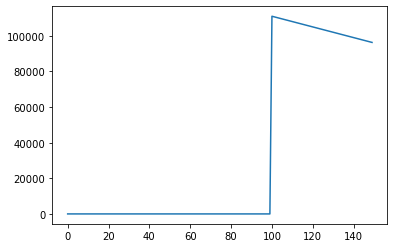

In [1117]:
m = L2.neurons
plt.plot(m[1].run(150)) #label_spikes[2][-1][0])[-1]

In [1115]:
label_spikes[2][-1][0]  #get the timestamp have to look for spike

150

In [1119]:
m[1].run(150)[-1]

160500

In [1142]:
for i in range(len(m[1].synapses)):
     s[i] = m[1].synapses[i].membrane_potential

s

0                           53500
1                          107000
2    [0, 0, 1, 2, 3, 6, 7, 9, 11]
dtype: object

In [1131]:
len(m[1].synapses)

2

In [1129]:
m[1].synapses[0].membrane_potential

53500